<!DOCTYPE html>
<html>
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Analysis of Voting Intention in Greece 21 May 2023 | Georgios Verouchis</title>
  <style>
    body {
      font-family: Arial, sans-serif;
      margin: 20px;
    }
    h1 {
      font-size: 28px;
      font-weight: bold;
      margin-bottom: 10px;
    }
  </style>
</head>
<body>
  <h1>Analysis of Voting Intention in Greece</h1>
  <p>By Georgios Verouchis</p>
</body>
</html>



<!-- Import necessary libraries -->
<p>In this cell, we import the necessary libraries that we'll be using in our analysis. These libraries include:</p>
<ul>
  <li><code>numpy</code>: a library for numerical computations in Python.</li>
  <li><code>pandas</code>: a library for data manipulation and analysis.</li>
  <li><code>seaborn</code>: a data visualization library based on Matplotlib.</li>
  <li><code>matplotlib.pyplot</code>: a plotting library for creating visualizations.</li>
  <li><code>warnings</code>: a module for controlling warning messages.</li>
  <li><code>matplotlib.lines</code>: a module for creating various types of lines in Matplotlib plots.</li>
  <li><code>scipy.optimize.curve_fit</code>: a function for fitting a curve to data points.</li>
  <li><code>scipy.stats</code>: a module for statistical functions and distributions.</li>
  <li><code>datetime</code>: a module for manipulating dates and times.</li>
</ul>


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import matplotlib.lines as mlines
from scipy.optimize import curve_fit
from scipy import stats
from scipy.optimize import curve_fit
import datetime as dt



<!-- Prepare colors for each party's plots -->
<p>In this cell, we define a dictionary called <code>colors</code> that associates each political party with a specific color. This color mapping will be used to differentiate and visually represent the data for each party in the plots. The parties and their corresponding colors are as follows:</p>
<ul>
  <li><strong>New Democracy</strong>: blue</li>
  <li><strong>SYRIZA</strong>: pink</li>
  <li><strong>PASOK</strong>: green</li>
  <li><strong>KKE</strong>: red</li>
  <li><strong>Elliniki Lysi</strong>: black</li>
  <li><strong>MERA25</strong>: orange</li>
</ul>
<p>Please note that these colors can be adjusted according to the logos or branding of each party for better visual representation.</p>


<!-- Define key dates and their descriptions -->
<p>We define a dictionary called <code>key_dates</code> that associates specific dates with their corresponding descriptions. These key dates are significant events or incidents related to the political landscape. The dates and their descriptions are as follows:</p>
<ul>
  <li><strong>March 6, 2021</strong>: Police violence in Nea Smyrni</li>
  <li><strong>July 26, 2022</strong>: Allegation of illegal surveillance by the president of PASOK</li>
  <li><strong>February 28, 2023</strong>: Tempe accident</li>
  <li><strong>December 12, 2021</strong>: PASOK Elections</li>
</ul>
<p>These key dates can be used for reference or analysis purposes in the subsequent parts of the code.</p>


In [2]:
# Prepare colors for each party's plots, adjust them according to their logos
parties = ['New Democracy', 'SYRIZA', 'PASOK', 'KKE', 'Elliniki Lysi', 'MERA25']

colors = {
    'New Democracy': 'blue',
    'SYRIZA': 'pink',
    'PASOK': 'green',
    'KKE': 'red',
    'Elliniki Lysi': 'black',
    'MERA25': 'orange'
}

key_dates = {
    'March 6, 2021': 'Police violence in Nea Smyrni',
    'July 26, 2022': 'Allegation of illegal surveillance by the president of PASOK',
    'February 28, 2023': 'Tempe accident',
    'December 12, 2021' : 'PASOK Elections'
}

<!-- Define a linear function -->
<p>In this cell, we define a function called <code>linear_func</code> that represents a linear equation of the form <code>y = a * x + b</code>. It takes the input variable <code>x</code> and two coefficients <code>a</code> and <code>b</code> as parameters. The function returns the value of <code>y</code> based on the given input and coefficients.</p>
  
<!-- Define a quadratic function -->
<p>We define a function called <code>quad_func</code> that represents a quadratic equation of the form <code>y = a * x^2 + b * x + c</code>. It takes the input variable <code>x</code> and three coefficients <code>a</code>, <code>b</code>, and <code>c</code> as parameters. The function returns the value of <code>y</code> based on the given input and coefficients.</p>

<!-- Define a cubic function -->
<p>We define a function called <code>cubic_func</code> that represents a cubic equation of the form <code>y = a * x^3 + b * x^2 + c * x + d</code>. It takes the input variable <code>x</code> and four coefficients <code>a</code>, <code>b</code>, <code>c</code>, and <code>d</code> as parameters. The function returns the value of <code>y</code> based on the given input and coefficients.</p>

<!-- Define an exponential function -->
<p>We define a function called <code>exp_func</code> that represents an exponential equation of the form <code>y = a * exp(b * x) + c</code>. It takes the input variable <code>x</code> and three coefficients <code>a</code>, <code>b</code>, and <code>c</code> as parameters. The function


In [3]:
def linear_func(x, a, b):
    return a * x + b

def quad_func(x, a, b, c):
    return a * x**2 + b * x + c

def cubic_func(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

def exp_func(x, a, b, c):
    return a * np.exp(b * x) + c

def log_func(x, a, b, c):
    return a * np.log(b * x) + c

<!-- Define a function to find the best fit curve -->
<p>In this cell, we define a function called <code>best_fit</code> that takes <code>x_data</code> and <code>y_data</code> as input parameters. It aims to find the best fit curve among several predefined curve functions.</p>

<p>The function starts by defining a list of curve functions called <code>curve_funcs</code> and a corresponding list of curve names called <code>curve_names</code>. These lists store the functions and names of the different curve types that will be considered for fitting.</p>

<p>Next, the function initializes variables for storing the best fit name, function, and optimized parameters, as well as the maximum coefficient of determination (<code>r-squared</code>) found so far.</p>

<p>A loop is then used to iterate over each curve function and its corresponding name. Inside the loop, the <code>curve_fit</code> function from the <code>scipy.optimize</code> module is applied to fit the current curve function to the given data points (<code>x_data</code> and <code>y_data</code>). The resulting optimized parameters are stored in <code>popt</code>.</p>

<p>The function then computes predictions for the given <code>x_data</code> using the current curve function and its optimized parameters. The <code>linregress</code> function from the <code>scipy.stats</code> module is used to calculate the coefficient of determination (<code>r-squared</code>) between the predicted values and the actual <code>y_data</code>.</p>

<p>If the current <code>r-squared</code> is greater than the maximum <code>r-squared</code> found so far, the variables for the best fit curve are updated with the current curve's information.</p>

<p>The function continues this process for all curve functions, ignoring any exceptions that may occur during the fitting process.</p>

<p>Finally, the function returns the best fit curve's name, function, and optimized parameters.</p>
</html>```

The provided explanation describes the purpose and functionality of the `best_fit` function, including its steps for finding the best fit curve based on the coefficient of determination (`r-squared`).


In [4]:
def best_fit(x_data, y_data):
    curve_funcs = [linear_func, quad_func, cubic_func, exp_func, log_func]
    curve_names = ['Linear', 'Quadratic', 'Cubic', 'Exponential', 'Logarithmic']
    
    best_fit_name = None
    best_fit_func = None
    best_fit_popt = None
    max_r_squared = -np.inf
    
    for curve_func, curve_name in zip(curve_funcs, curve_names):
        try:
            popt, _ = curve_fit(curve_func, x_data, y_data, maxfev=10000)
            predictions = curve_func(x_data, *popt)
            _, _, r_value, _, _ = stats.linregress(y_data, predictions)
            r_squared = r_value**2
            
            if r_squared > max_r_squared:
                max_r_squared = r_squared
                best_fit_name = curve_name
                best_fit_func = curve_func
                best_fit_popt = popt
        except:
            pass
    
    return best_fit_name, best_fit_func, best_fit_popt

<!-- Read and sort the data -->
<p>In this cell, we read a CSV file called <code>greece_polls_2021_2023.csv</code> using the <code>read_csv</code> function from the <code>pandas</code> library. The data from the file is loaded into a DataFrame called <code>df</code>.</p>

<p>The next step is to convert the 'Date' column in the DataFrame to datetime format using the <code>to_datetime</code> function from <code>pandas</code>. The parameter <code>dayfirst=True</code> is provided to indicate that the day appears before the month in the 'Date' column.</p>

<p>Afterwards, the DataFrame is sorted in ascending order based on the 'Date' column using the <code>sort_values</code> function.</p>

<!-- Add 'Ordinal Date' column -->
<p>In this cell, a new column called 'Ordinal Date' is added to the DataFrame <code>df</code>. The 'Ordinal Date' column is created by applying the <code>toordinal</code> function from the <code>datetime</code> module to each value in the 'Date' column. This function converts a date to its corresponding proleptic Gregorian ordinal.</p>

<!-- Average monthly results -->
<p>In this cell, a new column called 'YearMonth' is added to the DataFrame <code>df</code>. The 'YearMonth' column is created by extracting the year and month information from the 'Date' column using the <code>dt.to_period('M')</code> function. This function converts each date in the 'Date' column to its corresponding year and month period, resulting in average monthly results.</p>


In [5]:
# Read and sort the data
df = pd.read_csv('greece_polls_2021_2023.csv')
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.sort_values(by='Date')

# Add 'Ordinal Date' column
df['Ordinal Date'] = df['Date'].map(dt.datetime.toordinal)

# Average monthly results
df['YearMonth'] = df['Date'].dt.to_period('M')

<!-- Ignore warning messages -->
<p>We use the <code>filterwarnings</code> function to ignore warning messages that may arise during the execution of the code.</p>

<!-- Calculate monthly means -->
<p>We group the DataFrame <code>df</code> by the 'YearMonth' column and calculate the mean values for each column.</p>

<!-- Round values and drop 'Ordinal Date' column -->
<p>We round the values in the <code>df_monthly_means</code> DataFrame to two decimal places and drop the 'Ordinal Date' column.</p>

<!-- Save monthly means to a CSV file -->
<p>We save the <code>df_monthly_means</code> DataFrame to a CSV file called <code>monthly_means.csv</code>.</p>

<!-- Print message -->
<p>We print a message indicating that the monthly means have been saved to the 'monthly_means.csv' file.</p>

<!-- Perform best fit for each party -->
<p>We iterate over each party in the <code>parties</code> list and perform the best fit for each party's data.</p>
</html>




In [6]:
warnings.filterwarnings("ignore")

df_monthly = df.groupby('YearMonth').mean()
# Calculate the monthly means for each party
df_monthly_means = df.groupby(['YearMonth']).mean()

# Round the values to two decimal places
df_monthly_means = df_monthly_means.round(2)
df_monthly_means = df_monthly_means.drop('Ordinal Date', axis=1)

# Save the monthly means to a CSV file
df_monthly_means.to_csv('monthly_means.csv')

print("Monthly means saved to 'monthly_means.csv'")

# Use the 'Ordinal Date' column as your x_data
x_data = df_monthly['Ordinal Date'].values

for party in parties:
    y_data = df_monthly[party].values
    best_fit_name, best_fit_func, best_fit_popt = best_fit(x_data, y_data)
    
    print(f"Best fit for {party} is: {best_fit_name}")

Monthly means saved to 'monthly_means.csv'
Best fit for New Democracy is: Quadratic
Best fit for SYRIZA is: Quadratic
Best fit for PASOK is: Quadratic
Best fit for KKE is: Cubic
Best fit for Elliniki Lysi is: Quadratic
Best fit for MERA25 is: Cubic


<!-- Define the parties and their best fit functions -->
<p>In this cell, we define a dictionary called <code>party_fits</code> that associates each political party with its corresponding best fit function.</p>

<p>The parties and their best fit functions are as follows:</p>
<ul>
  <li><strong>New Democracy</strong>: Quadratic function (<code>quad_func</code>)</li>
  <li><strong>SYRIZA</strong>: Quadratic function (<code>quad_func</code>)</li>
  <li><strong>PASOK</strong>: Quadratic function (<code>quad_func</code>)</li>
  <li><strong>KKE</strong>: Cubic function (<code>cubic_func</code>)</li>
  <li><strong>Elliniki Lysi</strong>: Quadratic function (<code>quad_func</code>)</li>
  <li><strong>MERA25</strong>: Cubic function (<code>cubic_func</code>)</li>
</ul>

<p>This dictionary allows easy access to the best fit function for each party, enabling further analysis or plotting based on the selected function.</p>


In [7]:
# Defining the parties and their best fits
party_fits = {
    'New Democracy': quad_func,
    'SYRIZA': quad_func,
    'PASOK': quad_func,
    'KKE': cubic_func,
    'Elliniki Lysi': quad_func,
    'MERA25': cubic_func
}

<!-- Define colors for key events -->
<p>We define a list called <code>event_colors</code> that contains color values for key events.</p>

<!-- Set seaborn style and color palette -->
<p>We set the style of seaborn plots to "whitegrid" and the color palette to "colorblind".</p>

<!-- Add key events -->
<p>We define a list called <code>key_events</code> that contains tuples representing key events.</p>

<!-- Prepare x_data and x_pred -->
<p>We define the <code>x_data</code> and <code>x_pred</code> variables for data manipulation and plotting.</p>
</html>```

<!-- Predict and plot voting intention for each party -->
<p>In this loop, we iterate over each party and its corresponding best fit function in the <code>party_fits</code> dictionary.</p>
<ul>
  <li>A copy of the <code>df_monthly</code> DataFrame is created for the current party.</li>
  <li>A moving average is calculated by taking a rolling mean with a 3-month window using the <code>rolling</code> and <code>mean</code> functions on the party's data.</li>
  <li>NA values in the moving average column are dropped using the <code>dropna</code> function.</li>
  <li>The <code>y_data</code> for the current party is extracted from the moving average column.</li>
  <li>A curve is fitted to the <code>x_data</code> and <code>y_data</code> using the <code>curve_fit</code> function, and the optimized parameters are obtained.</li>
  <li>The voting intention is predicted for the <code>x_pred</code> using the best fit function and the optimized parameters.</li>
  <li>A plot is created to visualize the raw data, the moving average, and the fitted curve. Key events are marked on the plot using the <code>axvline</code> function and labeled in the legend.</li>
  <li>The plot is saved as a PNG file named "<party>_vote_intention.png".</li>
  <li>The predicted result for the party in the upcoming election on May 21, 2023 is printed.</li>
  <li>The predicted result for each party is stored in the <code>predicted_results</code> dictionary.</li>
</ul>

<!-- Transform and print the predicted results -->
<p>In this loop, we iterate over each party in the <code>parties</code> list.</p>
<ul>
  <li>The predicted result for the party is retrieved from the <code>predicted_results</code> dictionary


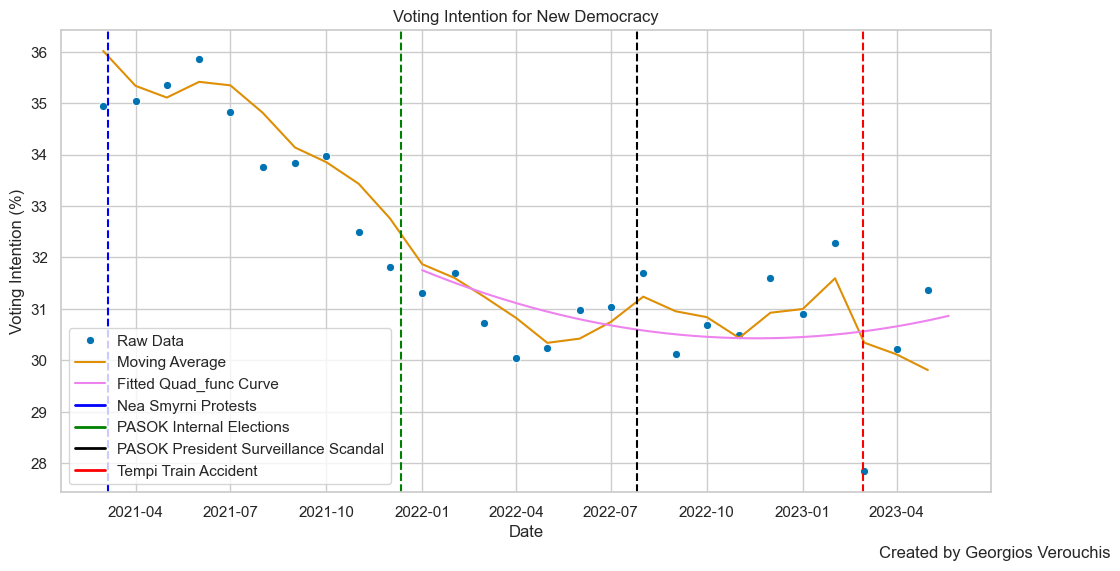

Predicted result for New Democracy on May 21, 2023: 30.86%


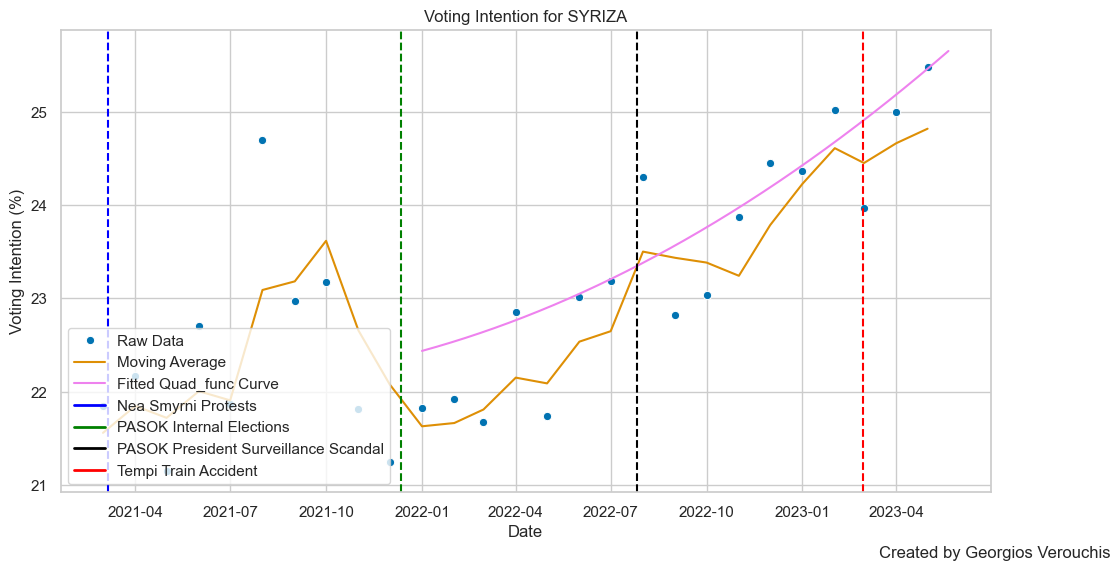

Predicted result for SYRIZA on May 21, 2023: 25.65%


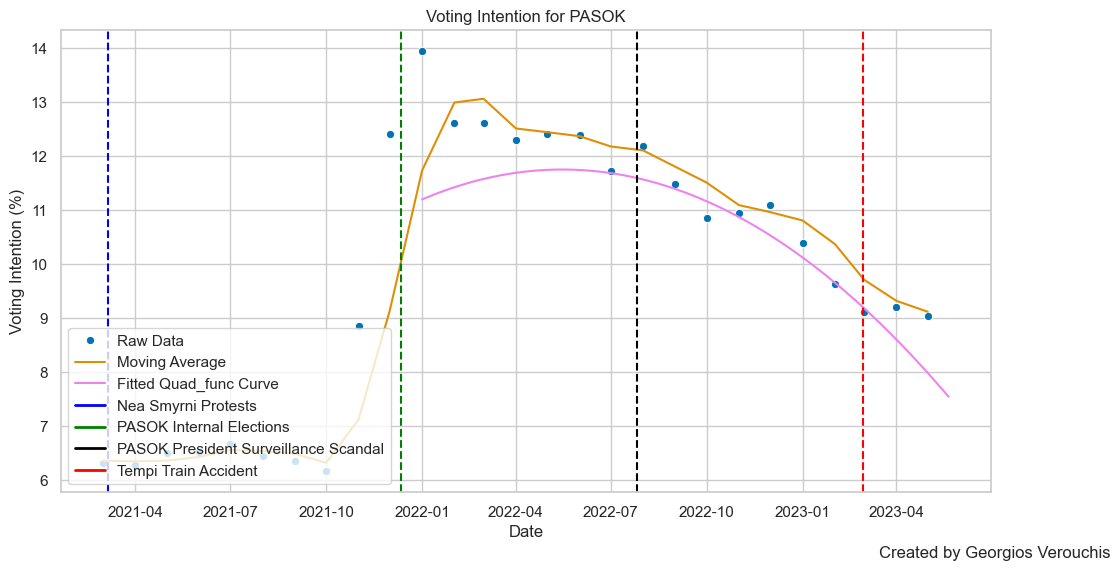

Predicted result for PASOK on May 21, 2023: 7.55%


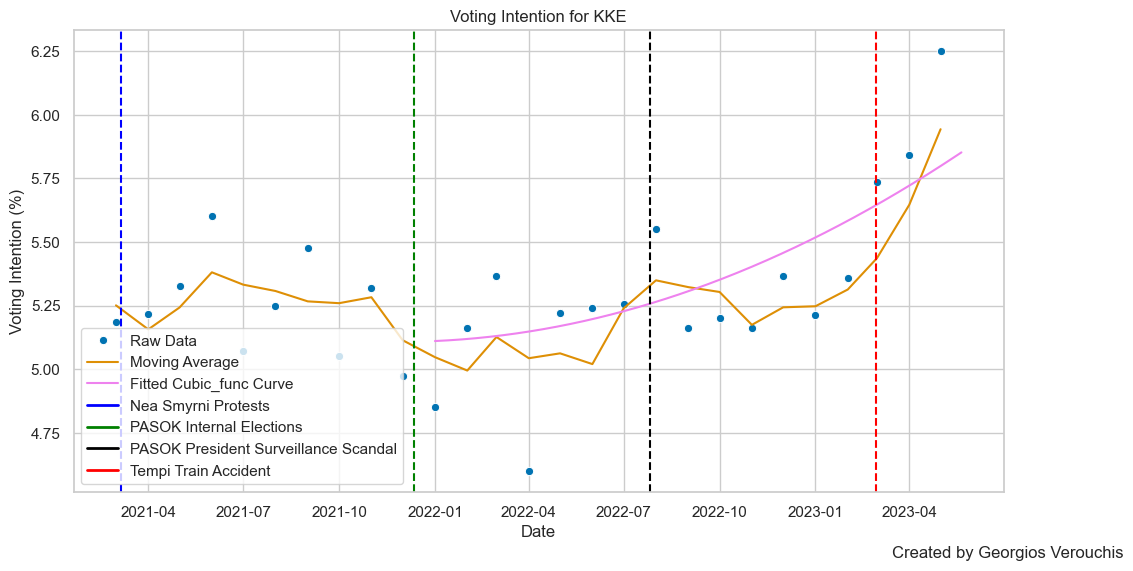

Predicted result for KKE on May 21, 2023: 5.85%


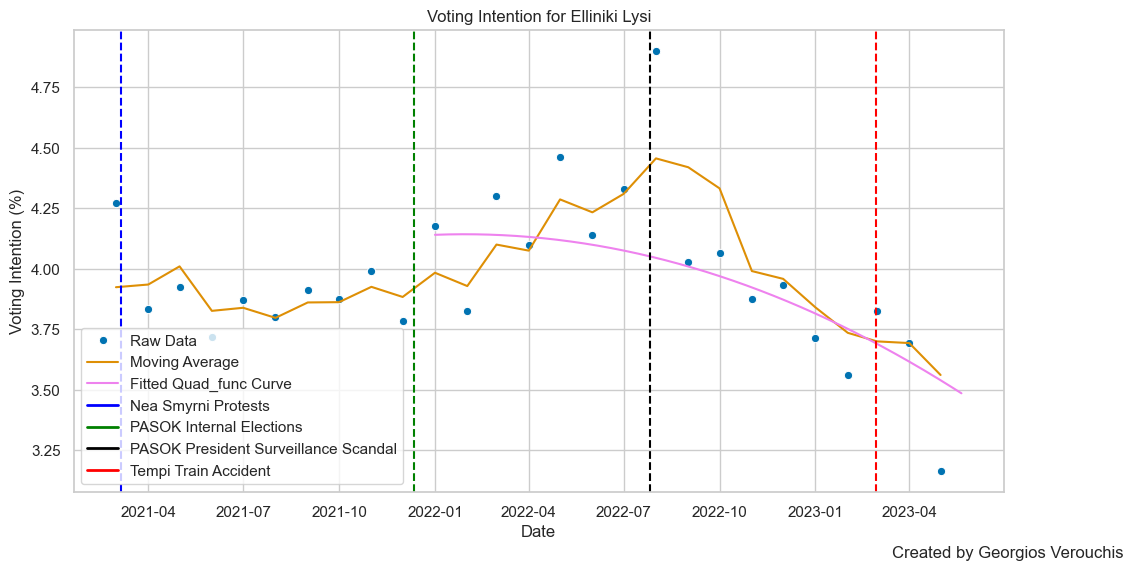

Predicted result for Elliniki Lysi on May 21, 2023: 3.49%


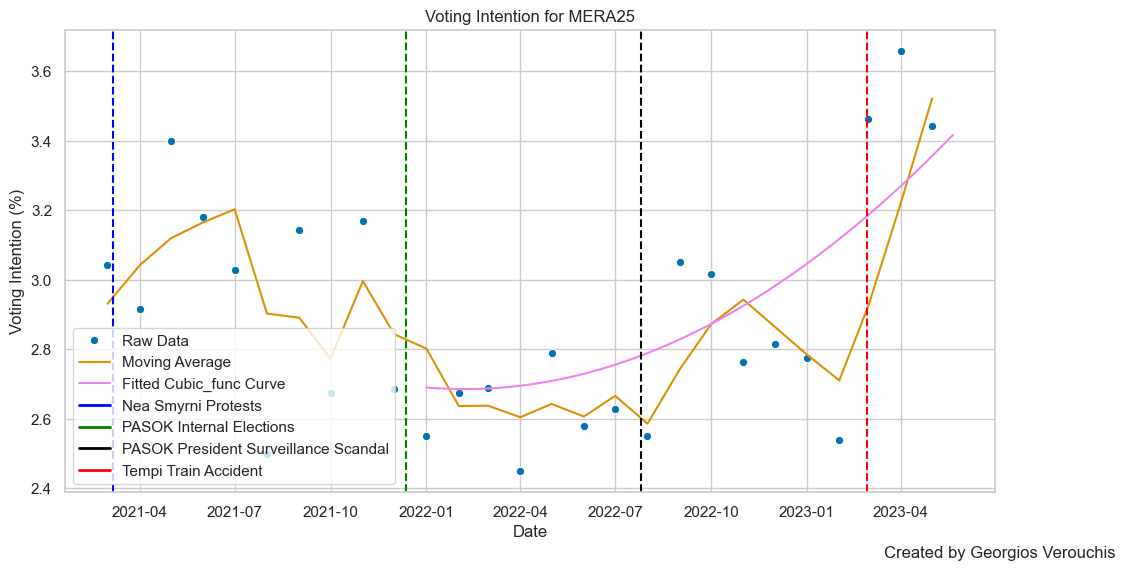

Predicted result for MERA25 on May 21, 2023: 3.42%
Transformed result for New Democracy on May 21, 2023: 36.96%
Transformed result for SYRIZA on May 21, 2023: 30.72%
Transformed result for PASOK on May 21, 2023: 9.04%
Transformed result for KKE on May 21, 2023: 7.01%
Transformed result for Elliniki Lysi on May 21, 2023: 4.17%
Transformed result for MERA25 on May 21, 2023: 4.09%


In [8]:
# Define colors for key events
event_colors = ['blue', 'green', 'black', 'red']

# Set seaborn style and color palette
sns.set(style="whitegrid")
sns.set_palette("colorblind")


# Add key events
key_events = [('2021-03-06', 'Nea Smyrni Protests'), 
              ('2021-12-12', 'PASOK Internal Elections'),
              ('2022-07-26', 'PASOK President Surveillance Scandal'), 
              ('2023-02-28', 'Tempi Train Accident')]

x_data = df_monthly.index.to_timestamp().map(dt.datetime.toordinal)

date_range = pd.date_range(start='2022-01-01', end='2023-05-21')
x_pred = date_range.map(dt.datetime.toordinal)

predicted_results = {}

for party, fit_func in party_fits.items():
    # Create a copy of df_monthly
    df_party = df_monthly.copy()

    # Create a moving average (we'll assume a 3-month window)
    df_party[f'{party}_MA'] = df_party[party].rolling(window=3).mean()

    # Drop NA values in 'party_MA' column
    df_party.dropna(subset=[f'{party}_MA'], inplace=True)

    # Get 'party_MA' data
    y_data = df_party[f'{party}_MA']

    # Fit a curve to the data
    popt, pcov = curve_fit(fit_func, x_data[:len(y_data)], y_data)
    # Predict voting intention
    predictions = fit_func(x_pred, *popt)

    # Plot the data and the fitted curve
    plt.figure(figsize=(12, 6))

    # Plot the raw data
    sns.lineplot(x=df_party.index.to_timestamp(), y=df_party[party], marker="o", linewidth=0, label='Raw Data')

    # Plot the moving average
    sns.lineplot(x=df_party.index.to_timestamp(), y=df_party[f'{party}_MA'], label='Moving Average')

    # Plot the fitted Curve
    sns.lineplot(x=date_range, y=predictions, label=f'Fitted {fit_func.__name__.capitalize()} Curve', color='violet')

    # Add key events
    for i, (date, event) in enumerate(key_events):
        plt.axvline(pd.to_datetime(date), color=event_colors[i], linestyle='--')
        plt.plot([], [], color=event_colors[i], label=event, linewidth=2)  # Add label to the legend

    # Add your credits
    plt.text(1, 0, 'Created by Georgios Verouchis', transform=plt.gcf().transFigure, ha='right')

    plt.title(f'Voting Intention for {party}')
    plt.xlabel('Date')
    plt.ylabel('Voting Intention (%)')
    plt.legend(loc='lower left')
    plt.grid(True)
    plt.savefig(f'{party}_vote_intention.png')
    plt.show()

    # Predict election result
    election_date = dt.datetime(2023, 5, 21).toordinal()
    predicted_result = fit_func(election_date, *popt)
    print(f"Predicted result for {party} on May 21, 2023: {predicted_result:.2f}%")
    predicted_results[party] = predicted_result


# Calculate the total percentage of the analyzed parties
total_percentage = sum(predicted_result for predicted_result in predicted_results.values())

# Calculate the transformation factor
transformation_factor = 0.92 / total_percentage

# Iterate through each party and print the transformed result
for party in parties:
    predicted_result = predicted_results[party]
    transformed_result = (predicted_result * transformation_factor)*100
    print(f"Transformed result for {party} on May 21, 2023: {transformed_result:.2f}%")

<!-- Define party fits with degree and color information -->
<p>We define a dictionary called <code>party_fits</code> that associates each political party with its respective degree and color information for fitting curves and plotting.</p>

<!-- Read and sort the data -->
<p>We read a CSV file called <code>greece_polls_2021_2023.csv</code> using the <code>read_csv</code> function from the <code>pandas</code> library. The data from the file is loaded into a DataFrame called <code>df</code>. The 'Date' column is then converted to a datetime type using <code>to_datetime</code>, and the DataFrame is sorted in ascending order based on the 'Date' column using <code>set_index</code> and <code>sort_index</code> functions.</p>

<!-- Resample and interpolate missing data -->
<p>We resample the DataFrame <code>df</code> to a daily frequency using the <code>resample</code> function with 'D' as the argument. This ensures that there is one value per day in the DataFrame. Then, we interpolate missing data using the <code>interpolate</code> function, which fills in missing values by generating values based on existing data points.</p>

<!-- Ignore warnings -->
<p>We use the <code>filterwarnings</code> function from the <code>warnings</code> module to ignore warning messages that may arise during the execution of the code. This is done by passing the argument <code>"ignore"</code> to the <code>filterwarnings</code> function.</p>

<!-- Function for polynomial fit and moving average -->
<p>We define two functions: <code>poly_fit</code> and <code>moving_average</code>.</p>

<!-- Predict and plot voting intention for each party -->
<p>We iterate over each party and its corresponding degree and color information in the <code>party_fits</code> dictionary.</p>

<!-- Print the mathematical forms of the fitted curves -->
<p>We iterate over each party and its corresponding coefficients in the <code>party_coefficients</code> dictionary. The coefficients represent the mathematical form of the fitted curves.</p>

<!-- Calculate and print the transformed results -->
<p>We iterate over each party in the <code>parties</code> list.</p>
</html>```



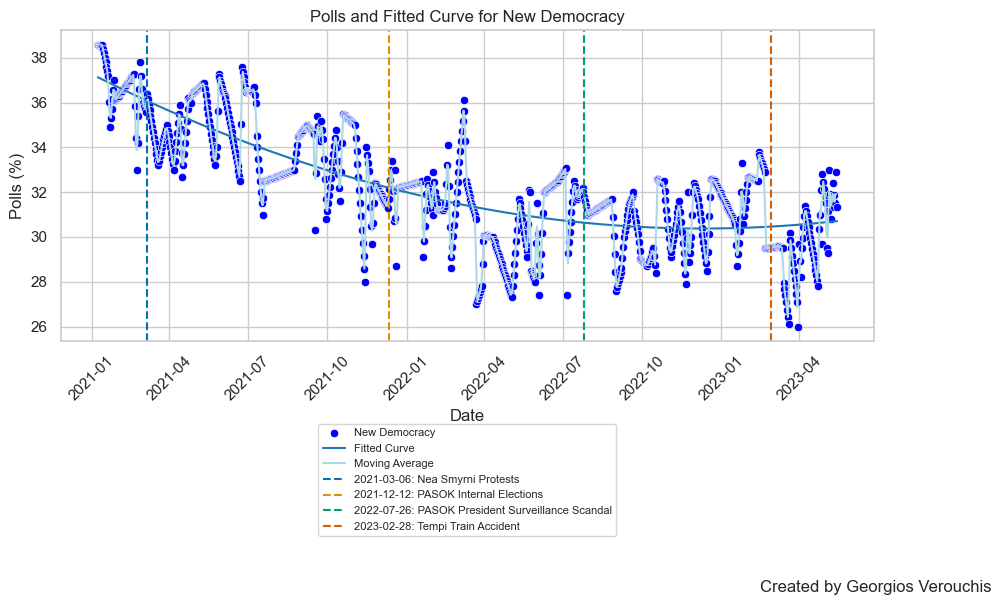

Party: New Democracy
Fitted Curve at Election Date (2023-05-21): 30.74%



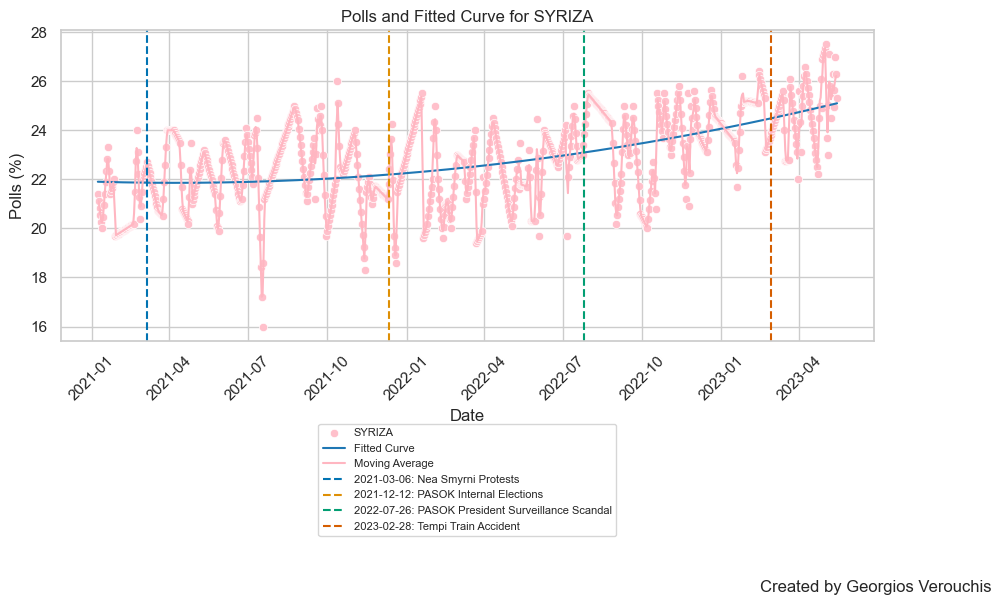

Party: SYRIZA
Fitted Curve at Election Date (2023-05-21): 25.15%



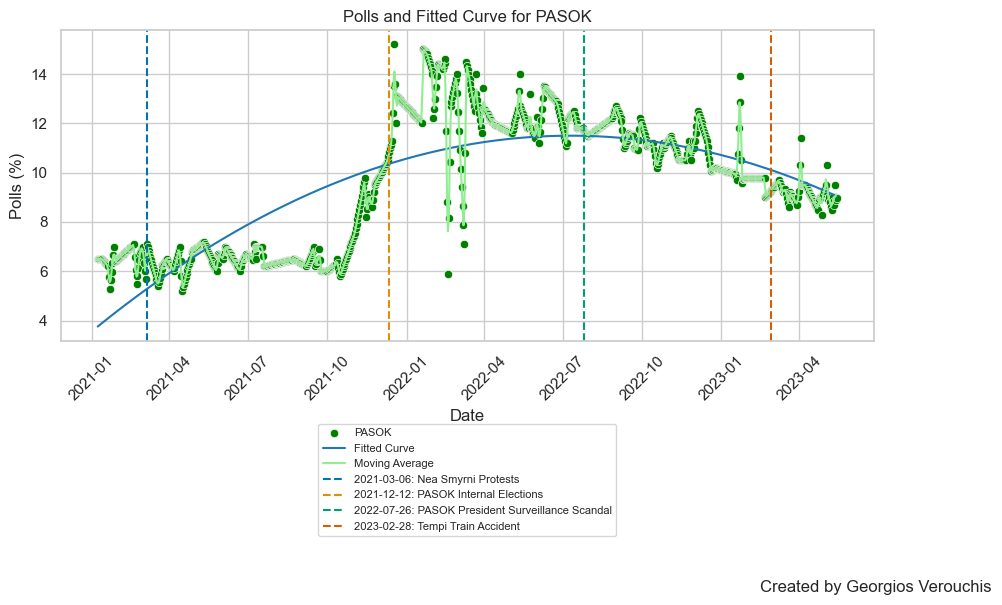

Party: PASOK
Fitted Curve at Election Date (2023-05-21): 8.95%



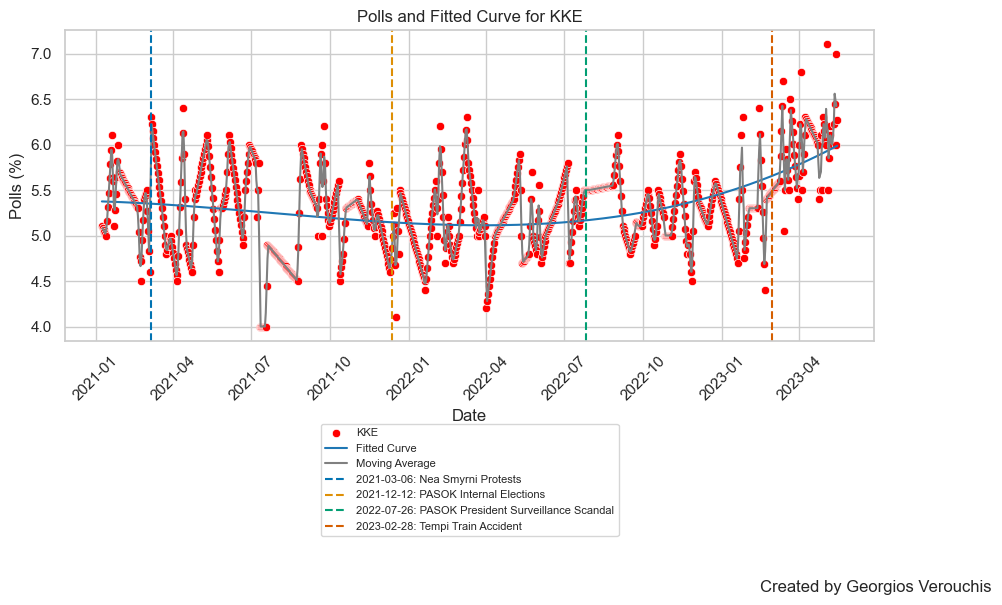

Party: KKE
Fitted Curve at Election Date (2023-05-21): 6.02%



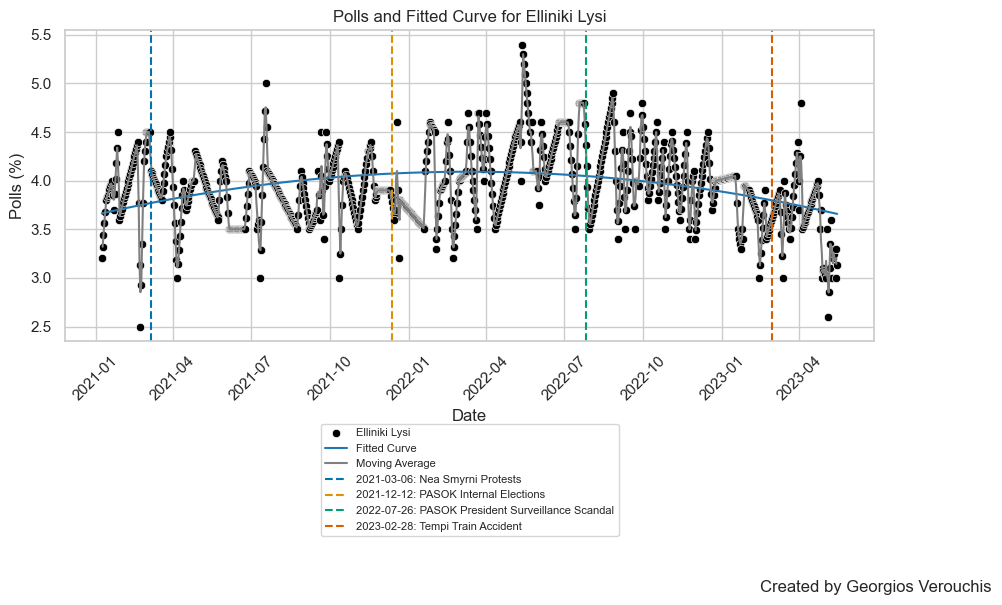

Party: Elliniki Lysi
Fitted Curve at Election Date (2023-05-21): 3.65%



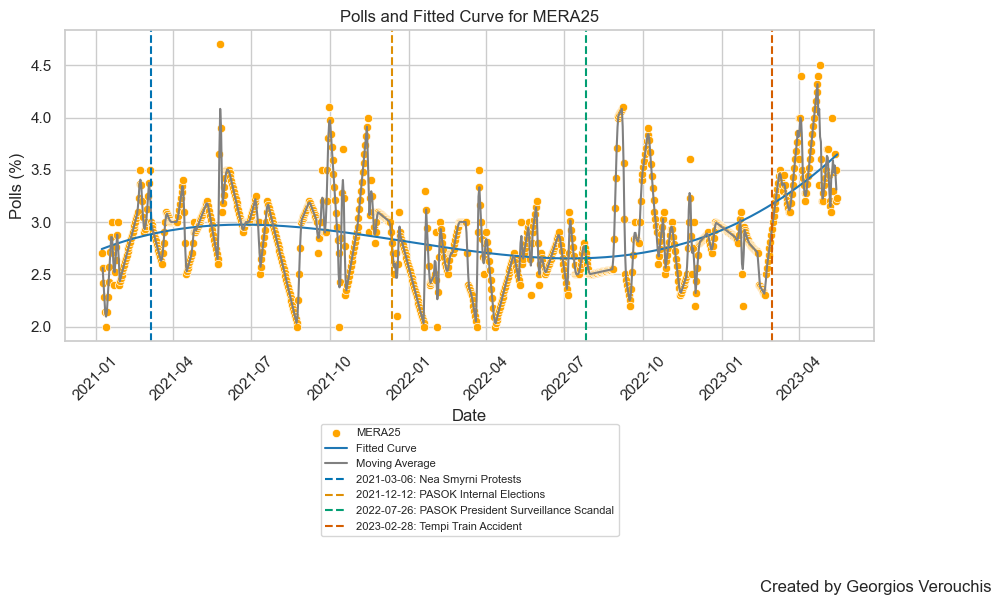

Party: MERA25
Fitted Curve at Election Date (2023-05-21): 3.69%

Party: New Democracy
Mathematical Form of the Fitted Curve:
y = 7499426.1116x^2 + -20.3098x + 0.0000

Party: SYRIZA
Mathematical Form of the Fitted Curve:
y = 3004834.9370x^2 + -8.1444x + 0.0000

Party: PASOK
Mathematical Form of the Fitted Curve:
y = -14041835.1470x^2 + 38.0359x + -0.0000

Party: KKE
Mathematical Form of the Fitted Curve:
y = -1799525196.3570x^3 + 7315.1796x^2 + -0.0099x + 0.0000

Party: Elliniki Lysi
Mathematical Form of the Fitted Curve:
y = -1280075.6891x^2 + 3.4680x + -0.0000

Party: MERA25
Mathematical Form of the Fitted Curve:
y = -4691961755.1040x^3 + 19069.0524x^2 + -0.0258x + 0.0000

Transformed result for New Democracy on May 21, 2023: 36.17%
Transformed result for SYRIZA on May 21, 2023: 29.59%
Transformed result for PASOK on May 21, 2023: 10.53%
Transformed result for KKE on May 21, 2023: 7.08%
Transformed result for Elliniki Lysi on May 21, 2023: 4.29%
Transformed result for MERA25 on May 21

In [23]:
# Read and sort the data
party_fits = {
    'New Democracy': {'degree': 2, 'color': 'blue'},  # Quadratic
    'SYRIZA': {'degree': 2, 'color': 'pink'},  # Quadratic
    'PASOK': {'degree': 2, 'color': 'green'},  # Quadratic
    'KKE': {'degree': 3, 'color': 'red'},  # Cubic
    'Elliniki Lysi': {'degree': 2, 'color': 'black'},  # Quadratic
    'MERA25': {'degree': 3, 'color': 'orange'}  # Cubic
}

df = pd.read_csv('greece_polls_2021_2023.csv')
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.set_index('Date').sort_index()

# If you have multiple polls on the same day, take the mean
df = df.resample('D').mean()

# Forward fill missing data
df = df.interpolate()

# Ignore warnings
warnings.filterwarnings("ignore")

# Function for quadratic and cubic fit
def poly_fit(x, y, degree):
    p = np.polyfit(x, y, degree)
    return np.polyval(p, x)

# Function for calculating moving average
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w
predicted_results = {}

# Election date
election_date = '2023-05-21'
party_coefficients = {}

# Loop through each party
for party, party_info in party_fits.items():
    # Skip if the party is not in the DataFrame
    if party not in df.columns:
        continue

    # Convert the dates to a numerical form for curve fitting
    x = np.array([d.toordinal() for d in df.index])

    # Extract the y-values for the specific party
    y = df[party].values

    # Compute moving average
    y_avg = moving_average(y, 3)

    # Fit the appropriate polynomial to the data
    y_fit = poly_fit(x, y, party_info['degree'])

    # Fit the appropriate polynomial to the data
    coefficients = np.polyfit(x, y, party_info['degree'])
    party_coefficients[party] = coefficients
    # Create a larger figure
    plt.figure(figsize=(10, 6))
    # Create the scatter plot
    sns.scatterplot(x=df.index, y=y, color=party_info['color'], label=party)

    # Plot the fitted curve
    plt.plot(df.index, y_fit, color='#1f77b4', label='Fitted Curve')

    # Plot the moving average
    try:
        plt.plot(df.index[1:-1], y_avg, color='light' + party_info['color'], label='Moving Average')
    except:
        plt.plot(df.index[1:-1], y_avg, color='grey', label='Moving Average')

    # Create a list to store the legend entries for key events
    event_legend_entries = []

    # Add key events to the legend and vertical lines to the plot
    for i, (date, event) in enumerate(key_events):
        event_date = pd.to_datetime(date)
        if df.index.min() <= event_date <= df.index.max():
            plt.axvline(event_date, color=f'C{i}', linestyle='--')  # Add a vertical line to the plot
            event_legend_entries.append(mlines.Line2D([], [], color=f'C{i}', linestyle='--', label=f'{date}: {event}'))  # Add the label to the legend

    plt.title('Polls and Fitted Curve for ' + party)
    plt.xlabel('Date')
    plt.ylabel('Polls (%)')
    plt.xticks(rotation=45)
    plt.grid(True)

    # Add your credits
    plt.text(1, 0, 'Created by Georgios Verouchis', transform=plt.gcf().transFigure, ha='right')

    # Create the legend outside the plot area
    plt.legend(handles=[*plt.gca().get_legend_handles_labels()[0], *event_legend_entries], bbox_to_anchor=(0.5, -0.25), loc='upper center', prop={'size': 8})

    plt.tight_layout()
    # Save the plot as a PNG file
    plt.savefig(f'{party}_plot_daily.png')
    plt.show()

    # Evaluate the fitted curve at the election date
    election_date_ordinal = pd.to_datetime(election_date).toordinal()
    fitted_poll = np.polyval(np.polyfit(x, y, party_info['degree']), election_date_ordinal)

    # Calculate the transformed percentage based on the total

    # Print the result
    print(f"Party: {party}")
    print(f"Fitted Curve at Election Date ({election_date}): {fitted_poll:.2f}%")
    predicted_results[party] = fitted_poll

    print()

# Print the mathematical forms of the fitted curves for each party
for party, coefficients in party_coefficients.items():
    print(f"Party: {party}")
    print("Mathematical Form of the Fitted Curve:")
    if len(coefficients) == 3:
        print(f"y = {coefficients[2]:.4f}x^2 + {coefficients[1]:.4f}x + {coefficients[0]:.4f}")
    elif len(coefficients) == 4:
        print(f"y = {coefficients[3]:.4f}x^3 + {coefficients[2]:.4f}x^2 + {coefficients[1]:.4f}x + {coefficients[0]:.4f}")
    print()

# Calculate the total percentage of the analyzed parties
total_percentage = sum(predicted_result for predicted_result in predicted_results.values())

# Calculate the transformation factor
transformation_factor = 0.92 / total_percentage

# Iterate through each party and print the transformed result
for party in parties:
    predicted_result = predicted_results[party]
    transformed_result = (predicted_result * transformation_factor)*100
    print(f"Transformed result for {party} on May 21, 2023: {transformed_result:.2f}%")